# Graph evaluation
Author: Jens Petit

Examplary at Line 54 Route 1 we evaluate the accuracy of our map creation process. For this purpose the official SWM graph is used as a ground truth.

In [5]:
from graph_utils import pose_graph_nx as pg
from graph_utils import plotter as plt
from graph_utils import optimizer_matrix_sparse as opti
from graph_utils.db_interface import DBInterface as dbi
from graph_utils import representor
from graph_utils import sparsifier
from graph_utils import pose_graph_helper
from graph_utils import rtree
import networkx as nx

import matplotlib.pyplot as pyplt
import pickle
import math
import numpy as np
import pdb 
import pandas as pd
from graph_utils import pose_graph_helper as pg_help

import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
red = (255, 0, 0, 0.6)
green = (0, 255, 0, 0.6)
blue = (0, 0, 255, 0.6)
grey = (160, 160, 160, 0.6)
violette = (255, 0, 255, 0.6)

### Load SWM graph

In [9]:
line_54_swm = pickle.load( open("../graphs/evaluation/swm_line_54_route_1.graph", "rb"))

In [10]:
len(line_54_swm.nx_graph.nodes)

861

### Load data generated graph

In [11]:
line_54_map = pickle.load( open("../graphs/line_54_1/line_54_1.graph", "rb"))

In [12]:
len(line_54_map.nx_graph.nodes)

890

In [13]:
sparse_54_map = sparsifier.sparsifyPoseGraph(line_54_map, criteria="rdp", epsilon=1)

Dropped 550 edges.


In [14]:
len(sparse_54_map.nx_graph.nodes)

340

This shows the data generated graph which was sparsified using RDP algorithm.

In [20]:
plotter = plt.Plotter()
plotter.addNodeLayer(sparse_54_map)
plotter.addEdgeLayer(sparse_54_map, color=(30, 30, 30, 0.9))
heatmap = plotter.addDoorLayer(sparse_54_map, door_hist=True, markers=False)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

In [25]:
heatmap.max_intensity = 8
heatmap.point_radius = 20

In [12]:
plotter = plt.Plotter()
plotter.addNodeLayer(line_54_map)
plotter.addEdgeLayer(line_54_map, color=(30, 30, 30, 0.9))
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

### Plot SWM vs data map

In [18]:
plotter = plt.Plotter()
plotter.addNodeLayer(line_54_swm, color=green, size=12)
plotter.addEdgeLayer(line_54_swm)
plotter.addNodeLayer(line_54_map, size=12)
plotter.addEdgeLayer(line_54_map, color=(30, 30, 30, 0.9))
heatmap = plotter.addDoorLayer(line_54_map, door_hist=True, markers=False)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

In [19]:
heatmap.max_intensityx_intensity = 20

### Loading raw data

In [5]:
graphs_raw_54 = pose_graph_helper.getGraphsDateLine(["2018-02-15", "2018-02-16"], [("54",1)], merged=False)

Starting to get trip Ids for 2 days and 1 lines
Now on date 2018-02-15.
Starting to get trip IDs. Takes a while....
We have 99 graphs
No data for this trip 1682011160!
Now on date 2018-02-16.
Starting to get trip IDs. Takes a while....
We have 102 graphs
No data for this trip 1683946001!
No data for this trip 1684114674!
No data for this trip 1684381356!
No data for this trip 1684502932!
No data for this trip 1685734827!
NaN data, no interpolation possible


In [264]:
plotter = plt.Plotter()
heatmap = plotter.addHeatmapLayer(graphs_raw_54)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

In [268]:
heatmap.max_intensity = 25

### Optimizing raw data graphs

In [7]:
optimizer = opti.Optimizer()

optim_graphs = []
for graph in graphs_raw_54:
    try:
        optig = optimizer.optimizeGD(graph)
    except (opti.NoDataException, opti.NaNGraphException):
        pass
    optim_graphs.append(optig)
    

Loss before any optimization 5309262.0
Current loss 4194442.5 at iteration 0
Current loss 876389.3125 at iteration 20
Current loss 533636.875 at iteration 40
Current loss 418450.25 at iteration 60
Current loss 363422.40625 at iteration 80
Current loss 331364.4375 at iteration 100
Current loss 310349.75 at iteration 120
Current loss 295576.375 at iteration 140
Current loss 284680.0625 at iteration 160
Current loss 276335.25 at iteration 180
Current loss 269744.78125 at iteration 200
Current loss 264405.9375 at iteration 220
Current loss 259994.25 at iteration 240
Current loss 256288.234375 at iteration 260
Current loss 253136.59375 at iteration 280
Current loss 250431.5 at iteration 300
Current loss 248092.71875 at iteration 320
Current loss 246061.3125 at iteration 340
Current loss 244289.859375 at iteration 360
Current loss 242738.953125 at iteration 380
Current loss 241375.53125 at iteration 400
Current loss 240172.46875 at iteration 420
Current loss 239106.015625 at iteration 440
Cu

Current loss 221256.5 at iteration 760
Current loss 220968.296875 at iteration 780
Current loss 220700.640625 at iteration 800
Current loss 220451.671875 at iteration 820
Current loss 220219.75 at iteration 840
Current loss 220003.546875 at iteration 860
Current loss 219802.21875 at iteration 880
Current loss 219614.1875 at iteration 900
Current loss 219438.875 at iteration 920
Current loss 219275.6875 at iteration 940
Current loss 219122.96875 at iteration 960
Current loss 218980.140625 at iteration 980
Max iterations run, last loss 218852.875
Nodes in computational graph: 472
Loss before any optimization 2225488.0
Current loss 1912038.25 at iteration 0
Current loss 642671.4375 at iteration 20
Current loss 472310.59375 at iteration 40
Current loss 403376.9375 at iteration 60
Current loss 364803.125 at iteration 80
Current loss 339413.125 at iteration 100
Current loss 321182.21875 at iteration 120
Current loss 307405.09375 at iteration 140
Current loss 296639.90625 at iteration 160
Cur

Current loss 231500.03125 at iteration 560
Current loss 230929.5 at iteration 580
Current loss 230406.8125 at iteration 600
Current loss 229927.390625 at iteration 620
Current loss 229487.140625 at iteration 640
Current loss 229081.046875 at iteration 660
Current loss 228706.6875 at iteration 680
Current loss 228361.359375 at iteration 700
Current loss 228041.46875 at iteration 720
Current loss 227744.625 at iteration 740
Current loss 227469.34375 at iteration 760
Current loss 227214.109375 at iteration 780
Current loss 226977.046875 at iteration 800
Current loss 226756.859375 at iteration 820
Current loss 226551.703125 at iteration 840
Current loss 226360.40625 at iteration 860
Current loss 226182.03125 at iteration 880
Current loss 226015.15625 at iteration 900
Current loss 225859.5 at iteration 920
Current loss 225713.578125 at iteration 940
Current loss 225577.140625 at iteration 960
Current loss 225449.9375 at iteration 980
Max iterations run, last loss 225336.25
Nodes in computat

Current loss 200288.046875 at iteration 520
Current loss 199657.75 at iteration 540
Current loss 199079.0625 at iteration 560
Current loss 198546.921875 at iteration 580
Current loss 198056.734375 at iteration 600
Current loss 197604.21875 at iteration 620
Current loss 197186.53125 at iteration 640
Current loss 196799.75 at iteration 660
Current loss 196441.03125 at iteration 680
Current loss 196108.6875 at iteration 700
Current loss 195800.3125 at iteration 720
Current loss 195514.109375 at iteration 740
Current loss 195247.5 at iteration 760
Current loss 194999.53125 at iteration 780
Current loss 194768.4375 at iteration 800
Current loss 194553.359375 at iteration 820
Current loss 194352.9375 at iteration 840
Current loss 194165.625 at iteration 860
Current loss 193990.78125 at iteration 880
Current loss 193827.234375 at iteration 900
Current loss 193674.8125 at iteration 920
Current loss 193531.90625 at iteration 940
Current loss 193397.75 at iteration 960
Current loss 193272.09375 

Current loss 286567.71875 at iteration 180
Current loss 279458.71875 at iteration 200
Current loss 273585.0625 at iteration 220
Current loss 268661.09375 at iteration 240
Current loss 264484.21875 at iteration 260
Current loss 260906.65625 at iteration 280
Current loss 257816.953125 at iteration 300
Current loss 255128.75 at iteration 320
Current loss 252774.28125 at iteration 340
Current loss 250700.1875 at iteration 360
Current loss 248863.40625 at iteration 380
Current loss 247228.21875 at iteration 400
Current loss 245767.546875 at iteration 420
Current loss 244457.375 at iteration 440
Current loss 243275.5 at iteration 460
Current loss 242208.0625 at iteration 480
Current loss 241241.015625 at iteration 500
Current loss 240361.96875 at iteration 520
Current loss 239560.890625 at iteration 540
Current loss 238829.71875 at iteration 560
Current loss 238160.96875 at iteration 580
Current loss 237547.125 at iteration 600
Current loss 236983.5 at iteration 620
Current loss 236465.03125

Current loss 232895.53125 at iteration 880
Current loss 232696.6875 at iteration 900
Current loss 232511.625 at iteration 920
Current loss 232339.21875 at iteration 940
Current loss 232179.40625 at iteration 960
Current loss 232029.84375 at iteration 980
Max iterations run, last loss 231896.765625
Nodes in computational graph: 472
Loss before any optimization 1800688.375
Current loss 1561846.625 at iteration 0
Current loss 563624.5 at iteration 20
Current loss 430263.6875 at iteration 40
Current loss 374764.75 at iteration 60
Current loss 341484.28125 at iteration 80
Current loss 318392.90625 at iteration 100
Current loss 301229.46875 at iteration 120
Current loss 287960.46875 at iteration 140
Current loss 277427.71875 at iteration 160
Current loss 268899.65625 at iteration 180
Current loss 261884.171875 at iteration 200
Current loss 256035.390625 at iteration 220
Current loss 251103.21875 at iteration 240
Current loss 246903.5625 at iteration 260
Current loss 243295.90625 at iteration

Current loss 169465.328125 at iteration 520
Current loss 168949.140625 at iteration 540
Current loss 168475.046875 at iteration 560
Current loss 168039.34375 at iteration 580
Current loss 167637.75 at iteration 600
Current loss 167268.046875 at iteration 620
Current loss 166925.875 at iteration 640
Current loss 166608.921875 at iteration 660
Current loss 166315.875 at iteration 680
Current loss 166043.703125 at iteration 700
Current loss 165791.4375 at iteration 720
Current loss 165556.90625 at iteration 740
Current loss 165338.515625 at iteration 760
Current loss 165134.9375 at iteration 780
Current loss 164945.5625 at iteration 800
Current loss 164768.796875 at iteration 820
Current loss 164603.9375 at iteration 840
Current loss 164449.765625 at iteration 860
Current loss 164305.09375 at iteration 880
Current loss 164170.0625 at iteration 900
Current loss 164043.984375 at iteration 920
Current loss 163925.84375 at iteration 940
Current loss 163815.09375 at iteration 960
Current loss 

Current loss 232674.1875 at iteration 200
Current loss 228554.125 at iteration 220
Current loss 225047.875 at iteration 240
Current loss 222031.859375 at iteration 260
Current loss 219412.28125 at iteration 280
Current loss 217119.09375 at iteration 300
Current loss 215097.3125 at iteration 320
Current loss 213303.171875 at iteration 340
Current loss 211703.6875 at iteration 360
Current loss 210269.8125 at iteration 380
Current loss 208978.578125 at iteration 400
Current loss 207813.875 at iteration 420
Current loss 206758.171875 at iteration 440
Current loss 205798.390625 at iteration 460
Current loss 204923.28125 at iteration 480
Current loss 204124.84375 at iteration 500
Current loss 203393.5625 at iteration 520
Current loss 202722.59375 at iteration 540
Current loss 202105.65625 at iteration 560
Current loss 201538.21875 at iteration 580
Current loss 201015.0625 at iteration 600
Current loss 200531.78125 at iteration 620
Current loss 200084.859375 at iteration 640
Current loss 1996

Loss before any optimization 884249.4375
Current loss 807715.5 at iteration 0
Current loss 436010.34375 at iteration 20
Current loss 363445.4375 at iteration 40
Current loss 326803.375 at iteration 60
Current loss 303645.5 at iteration 80
Current loss 287463.9375 at iteration 100
Current loss 275485.03125 at iteration 120
Current loss 266263.6875 at iteration 140
Current loss 258960.265625 at iteration 160
Current loss 253045.125 at iteration 180
Current loss 248165.140625 at iteration 200
Current loss 244075.0 at iteration 220
Current loss 240600.90625 at iteration 240
Current loss 237616.625 at iteration 260
Current loss 235026.21875 at iteration 280
Current loss 232759.625 at iteration 300
Current loss 230759.671875 at iteration 320
Current loss 228984.328125 at iteration 340
Current loss 227399.296875 at iteration 360
Current loss 225975.796875 at iteration 380
Current loss 224691.0625 at iteration 400
Current loss 223528.5 at iteration 420
Current loss 222471.15625 at iteration 44

Current loss 188046.96875 at iteration 880
Current loss 187869.125 at iteration 900
Current loss 187702.59375 at iteration 920
Current loss 187546.59375 at iteration 940
Current loss 187400.5 at iteration 960
Current loss 187263.421875 at iteration 980
Max iterations run, last loss 187141.4375
Nodes in computational graph: 472
Loss before any optimization 1490057.25
Current loss 1275382.5 at iteration 0
Current loss 505466.8125 at iteration 20
Current loss 401732.78125 at iteration 40
Current loss 356502.28125 at iteration 60
Current loss 329192.875 at iteration 80
Current loss 310435.59375 at iteration 100
Current loss 296654.75 at iteration 120
Current loss 286074.15625 at iteration 140
Current loss 277689.15625 at iteration 160
Current loss 270882.375 at iteration 180
Current loss 265247.0625 at iteration 200
Current loss 260507.71875 at iteration 220
Current loss 256469.96875 at iteration 240
Current loss 252990.484375 at iteration 260
Current loss 249963.9375 at iteration 280
Curr

Current loss 224833.9375 at iteration 520
Current loss 224080.71875 at iteration 540
Current loss 223387.53125 at iteration 560
Current loss 222748.765625 at iteration 580
Current loss 222158.1875 at iteration 600
Current loss 221611.8125 at iteration 620
Current loss 221106.34375 at iteration 640
Current loss 220636.515625 at iteration 660
Current loss 220200.609375 at iteration 680
Current loss 219796.78125 at iteration 700
Current loss 219420.859375 at iteration 720
Current loss 219070.609375 at iteration 740
Current loss 218744.953125 at iteration 760
Current loss 218441.59375 at iteration 780
Current loss 218158.84375 at iteration 800
Current loss 217894.78125 at iteration 820
Current loss 217647.421875 at iteration 840
Current loss 217416.609375 at iteration 860
Current loss 217200.625 at iteration 880
Current loss 216999.1875 at iteration 900
Current loss 216810.0625 at iteration 920
Current loss 216633.484375 at iteration 940
Current loss 216468.046875 at iteration 960
Current 

Current loss 308873.75 at iteration 200
Current loss 302963.0 at iteration 220
Current loss 297925.0 at iteration 240
Current loss 293584.1875 at iteration 260
Current loss 289810.28125 at iteration 280
Current loss 286504.0 at iteration 300
Current loss 283585.375 at iteration 320
Current loss 280994.1875 at iteration 340
Current loss 278680.65625 at iteration 360
Current loss 276604.78125 at iteration 380
Current loss 274734.625 at iteration 400
Current loss 273044.9375 at iteration 420
Current loss 271511.1875 at iteration 440
Current loss 270115.84375 at iteration 460
Current loss 268843.6875 at iteration 480
Current loss 267681.1875 at iteration 500
Current loss 266615.15625 at iteration 520
Current loss 265636.875 at iteration 540
Current loss 264736.65625 at iteration 560
Current loss 263908.0625 at iteration 580
Current loss 263143.8125 at iteration 600
Current loss 262437.59375 at iteration 620
Current loss 261784.34375 at iteration 640
Current loss 261178.90625 at iteration 6

Loss before any optimization 3289376.0
Current loss 2737356.0 at iteration 0
Current loss 692333.75 at iteration 20
Current loss 454909.03125 at iteration 40
Current loss 364082.4375 at iteration 60
Current loss 316664.625 at iteration 80
Current loss 287687.625 at iteration 100
Current loss 268238.34375 at iteration 120
Current loss 254373.4375 at iteration 140
Current loss 244078.28125 at iteration 160
Current loss 236204.859375 at iteration 180
Current loss 230042.28125 at iteration 200
Current loss 225126.234375 at iteration 220
Current loss 221141.3125 at iteration 240
Current loss 217865.4375 at iteration 260
Current loss 215140.625 at iteration 280
Current loss 212848.96875 at iteration 300
Current loss 210903.984375 at iteration 320
Current loss 209238.765625 at iteration 340
Current loss 207803.03125 at iteration 360
Current loss 206556.625 at iteration 380
Current loss 205466.34375 at iteration 400
Current loss 204508.3125 at iteration 420
Current loss 203661.0625 at iteratio

Current loss 231476.25 at iteration 880
Current loss 231264.609375 at iteration 900
Current loss 231066.453125 at iteration 920
Current loss 230880.984375 at iteration 940
Current loss 230707.890625 at iteration 960
Current loss 230545.171875 at iteration 980
Max iterations run, last loss 230400.171875
Nodes in computational graph: 472
Loss before any optimization 721600.0
Current loss 672935.3125 at iteration 0
Current loss 371728.125 at iteration 20
Current loss 304360.1875 at iteration 40
Current loss 271261.34375 at iteration 60
Current loss 250711.234375 at iteration 80
Current loss 236451.609375 at iteration 100
Current loss 225931.46875 at iteration 120
Current loss 217866.25 at iteration 140
Current loss 211506.65625 at iteration 160
Current loss 206378.59375 at iteration 180
Current loss 202161.140625 at iteration 200
Current loss 198638.28125 at iteration 220
Current loss 195653.40625 at iteration 240
Current loss 193093.953125 at iteration 260
Current loss 190878.828125 at i

Current loss 216326.875 at iteration 540
Current loss 215713.3125 at iteration 560
Current loss 215148.5 at iteration 580
Current loss 214626.140625 at iteration 600
Current loss 214143.78125 at iteration 620
Current loss 213697.28125 at iteration 640
Current loss 213283.4375 at iteration 660
Current loss 212899.171875 at iteration 680
Current loss 212542.234375 at iteration 700
Current loss 212211.0 at iteration 720
Current loss 211902.78125 at iteration 740
Current loss 211614.65625 at iteration 760
Current loss 211346.0 at iteration 780
Current loss 211096.0 at iteration 800
Current loss 210862.25 at iteration 820
Current loss 210643.78125 at iteration 840
Current loss 210438.625 at iteration 860
Current loss 210246.90625 at iteration 880
Current loss 210068.546875 at iteration 900
Current loss 209901.09375 at iteration 920
Current loss 209743.28125 at iteration 940
Current loss 209595.15625 at iteration 960
Current loss 209456.3125 at iteration 980
Max iterations run, last loss 209

Current loss 216833.4375 at iteration 180
Current loss 212124.359375 at iteration 200
Current loss 208193.40625 at iteration 220
Current loss 204867.78125 at iteration 240
Current loss 202022.375 at iteration 260
Current loss 199564.03125 at iteration 280
Current loss 197422.90625 at iteration 300
Current loss 195545.953125 at iteration 320
Current loss 193889.21875 at iteration 340
Current loss 192417.8125 at iteration 360
Current loss 191106.65625 at iteration 380
Current loss 189932.90625 at iteration 400
Current loss 188878.3125 at iteration 420
Current loss 187927.28125 at iteration 440
Current loss 187067.234375 at iteration 460
Current loss 186287.359375 at iteration 480
Current loss 185577.671875 at iteration 500
Current loss 184931.34375 at iteration 520
Current loss 184341.25 at iteration 540
Current loss 183800.65625 at iteration 560
Current loss 183304.34375 at iteration 580
Current loss 182849.734375 at iteration 600
Current loss 182432.15625 at iteration 620
Current loss 

Loss before any optimization 2933984.75
Current loss 2409432.5 at iteration 0
Current loss 642859.5625 at iteration 20
Current loss 443625.125 at iteration 40
Current loss 367349.34375 at iteration 60
Current loss 326032.71875 at iteration 80
Current loss 300657.9375 at iteration 100
Current loss 284094.6875 at iteration 120
Current loss 272426.0 at iteration 140
Current loss 263619.65625 at iteration 160
Current loss 256673.015625 at iteration 180
Current loss 251039.15625 at iteration 200
Current loss 246379.90625 at iteration 220
Current loss 242468.75 at iteration 240
Current loss 239141.65625 at iteration 260
Current loss 236283.96875 at iteration 280
Current loss 233806.15625 at iteration 300
Current loss 231640.625 at iteration 320
Current loss 229733.40625 at iteration 340
Current loss 228045.140625 at iteration 360
Current loss 226541.875 at iteration 380
Current loss 225197.3125 at iteration 400
Current loss 223988.09375 at iteration 420
Current loss 222897.15625 at iteration

Current loss 257823.40625 at iteration 780
Current loss 257406.5 at iteration 800
Current loss 257013.34375 at iteration 820
Current loss 256642.734375 at iteration 840
Current loss 256291.5625 at iteration 860
Current loss 255958.140625 at iteration 880
Current loss 255642.234375 at iteration 900
Current loss 255342.1875 at iteration 920
Current loss 255056.625 at iteration 940
Current loss 254784.21875 at iteration 960
Current loss 254523.8125 at iteration 980
Max iterations run, last loss 254287.71875
Nodes in computational graph: 472
Loss before any optimization 12908111.0
Current loss 6210131.5 at iteration 0
Current loss 1609325.25 at iteration 20
Current loss 1137968.5 at iteration 40
Current loss 924831.25 at iteration 60
Current loss 798231.125 at iteration 80
Current loss 714897.625 at iteration 100
Current loss 655417.5 at iteration 120
Current loss 609485.1875 at iteration 140
Current loss 571170.3125 at iteration 160
Current loss 536971.25 at iteration 180
Current loss 505

Current loss 278985.09375 at iteration 800
Current loss 278705.375 at iteration 820
Current loss 278446.375 at iteration 840
Current loss 278206.1875 at iteration 860
Current loss 277984.1875 at iteration 880
Current loss 277778.3125 at iteration 900
Current loss 277586.9375 at iteration 920
Current loss 277409.28125 at iteration 940
Current loss 277244.1875 at iteration 960
Current loss 277090.4375 at iteration 980
Max iterations run, last loss 276954.25
Nodes in computational graph: 472
Loss before any optimization 5257245.5
Current loss 4236952.5 at iteration 0
Current loss 980697.8125 at iteration 20
Current loss 630503.25 at iteration 40
Current loss 498692.625 at iteration 60
Current loss 429924.15625 at iteration 80
Current loss 387567.0 at iteration 100
Current loss 358916.5625 at iteration 120
Current loss 338355.03125 at iteration 140
Current loss 323002.59375 at iteration 160
Current loss 311233.65625 at iteration 180
Current loss 302032.0625 at iteration 200
Current loss 29

Current loss 263224.0625 at iteration 540
Current loss 262318.6875 at iteration 560
Current loss 261485.203125 at iteration 580
Current loss 260716.515625 at iteration 600
Current loss 260006.71875 at iteration 620
Current loss 259349.90625 at iteration 640
Current loss 258741.890625 at iteration 660
Current loss 258180.84375 at iteration 680
Current loss 257659.75 at iteration 700
Current loss 257177.046875 at iteration 720
Current loss 256727.90625 at iteration 740
Current loss 256310.46875 at iteration 760
Current loss 255922.9375 at iteration 780
Current loss 255562.140625 at iteration 800
Current loss 255226.59375 at iteration 820
Current loss 254914.09375 at iteration 840
Current loss 254622.53125 at iteration 860
Current loss 254350.90625 at iteration 880
Current loss 254097.078125 at iteration 900
Current loss 253860.125 at iteration 920
Current loss 253639.0625 at iteration 940
Current loss 253432.40625 at iteration 960
Current loss 253238.8125 at iteration 980
Max iterations 

Current loss 261498.953125 at iteration 220
Current loss 257433.65625 at iteration 240
Current loss 253911.984375 at iteration 260
Current loss 250836.109375 at iteration 280
Current loss 248131.03125 at iteration 300
Current loss 245739.03125 at iteration 320
Current loss 243611.46875 at iteration 340
Current loss 241710.53125 at iteration 360
Current loss 240005.125 at iteration 380
Current loss 238469.59375 at iteration 400
Current loss 237082.21875 at iteration 420
Current loss 235825.5 at iteration 440
Current loss 234683.46875 at iteration 460
Current loss 233642.59375 at iteration 480
Current loss 232692.90625 at iteration 500
Current loss 231824.390625 at iteration 520
Current loss 231028.96875 at iteration 540
Current loss 230298.390625 at iteration 560
Current loss 229626.171875 at iteration 580
Current loss 229008.1875 at iteration 600
Current loss 228438.0 at iteration 620
Current loss 227912.703125 at iteration 640
Current loss 227426.953125 at iteration 660
Current loss 2

Loss before any optimization 1067047.125
Current loss 952432.5625 at iteration 0
Current loss 457124.21875 at iteration 20
Current loss 366531.6875 at iteration 40
Current loss 324125.0625 at iteration 60
Current loss 298763.8125 at iteration 80
Current loss 281771.28125 at iteration 100
Current loss 269611.5625 at iteration 120
Current loss 260500.53125 at iteration 140
Current loss 253426.265625 at iteration 160
Current loss 247772.0 at iteration 180
Current loss 243144.25 at iteration 200
Current loss 239282.390625 at iteration 220
Current loss 236006.28125 at iteration 240
Current loss 233187.75 at iteration 260
Current loss 230734.25 at iteration 280
Current loss 228578.0625 at iteration 300
Current loss 226668.21875 at iteration 320
Current loss 224964.328125 at iteration 340
Current loss 223434.4375 at iteration 360
Current loss 222053.828125 at iteration 380
Current loss 220803.796875 at iteration 400
Current loss 219666.0 at iteration 420
Current loss 218628.484375 at iteratio

Current loss 184021.46875 at iteration 820
Current loss 183816.359375 at iteration 840
Current loss 183623.890625 at iteration 860
Current loss 183443.453125 at iteration 880
Current loss 183275.140625 at iteration 900
Current loss 183117.59375 at iteration 920
Current loss 182969.34375 at iteration 940
Current loss 182830.609375 at iteration 960
Current loss 182700.625 at iteration 980
Max iterations run, last loss 182584.296875
Nodes in computational graph: 472
Loss before any optimization 821004.5625
Current loss 765840.125 at iteration 0
Current loss 433398.71875 at iteration 20
Current loss 353564.1875 at iteration 40
Current loss 312834.625 at iteration 60
Current loss 287515.8125 at iteration 80
Current loss 270153.125 at iteration 100
Current loss 257466.078125 at iteration 120
Current loss 247775.71875 at iteration 140
Current loss 240129.578125 at iteration 160
Current loss 233943.78125 at iteration 180
Current loss 228839.59375 at iteration 200
Current loss 224557.53125 at i

Current loss 213173.875 at iteration 480
Current loss 212303.0 at iteration 500
Current loss 211510.40625 at iteration 520
Current loss 210787.828125 at iteration 540
Current loss 210127.765625 at iteration 560
Current loss 209524.375 at iteration 580
Current loss 208970.625 at iteration 600
Current loss 208462.015625 at iteration 620
Current loss 207993.375 at iteration 640
Current loss 207561.875 at iteration 660
Current loss 207163.59375 at iteration 680
Current loss 206795.96875 at iteration 700
Current loss 206456.09375 at iteration 720
Current loss 206141.4375 at iteration 740
Current loss 205849.21875 at iteration 760
Current loss 205577.84375 at iteration 780
Current loss 205325.34375 at iteration 800
Current loss 205091.53125 at iteration 820
Current loss 204873.78125 at iteration 840
Current loss 204671.109375 at iteration 860
Current loss 204481.96875 at iteration 880
Current loss 204306.0625 at iteration 900
Current loss 204142.0625 at iteration 920
Current loss 203988.9531

Current loss 337373.1875 at iteration 200
Current loss 329612.5 at iteration 220
Current loss 323038.46875 at iteration 240
Current loss 317406.46875 at iteration 260
Current loss 312536.46875 at iteration 280
Current loss 308296.0 at iteration 300
Current loss 304579.25 at iteration 320
Current loss 301303.71875 at iteration 340
Current loss 298403.9375 at iteration 360
Current loss 295824.96875 at iteration 380
Current loss 293524.0625 at iteration 400
Current loss 291464.46875 at iteration 420
Current loss 289616.53125 at iteration 440
Current loss 287951.5 at iteration 460
Current loss 286450.21875 at iteration 480
Current loss 285091.9375 at iteration 500
Current loss 283860.1875 at iteration 520
Current loss 282740.71875 at iteration 540
Current loss 281723.1875 at iteration 560
Current loss 280794.8125 at iteration 580
Current loss 279948.3125 at iteration 600
Current loss 279172.53125 at iteration 620
Current loss 278463.40625 at iteration 640
Current loss 277813.25 at iteratio

Loss before any optimization 963847.625
Current loss 880089.0625 at iteration 0
Current loss 450797.78125 at iteration 20
Current loss 365841.375 at iteration 40
Current loss 326308.625 at iteration 60
Current loss 302463.40625 at iteration 80
Current loss 286197.4375 at iteration 100
Current loss 274266.59375 at iteration 120
Current loss 265083.96875 at iteration 140
Current loss 257769.109375 at iteration 160
Current loss 251789.21875 at iteration 180
Current loss 246804.296875 at iteration 200
Current loss 242579.46875 at iteration 220
Current loss 238951.90625 at iteration 240
Current loss 235802.78125 at iteration 260
Current loss 233043.546875 at iteration 280
Current loss 230607.75 at iteration 300
Current loss 228442.828125 at iteration 320
Current loss 226507.96875 at iteration 340
Current loss 224770.375 at iteration 360
Current loss 223203.328125 at iteration 380
Current loss 221784.71875 at iteration 400
Current loss 220495.59375 at iteration 420
Current loss 219321.53125 

Current loss 261777.90625 at iteration 940
Current loss 261553.5625 at iteration 960
Current loss 261344.0625 at iteration 980
Max iterations run, last loss 261156.921875
Nodes in computational graph: 472
Loss before any optimization 2942897.0
Current loss 2464214.0 at iteration 0
Current loss 601898.375 at iteration 20
Current loss 399153.9375 at iteration 40
Current loss 327309.46875 at iteration 60
Current loss 290493.21875 at iteration 80
Current loss 268035.96875 at iteration 100
Current loss 252948.171875 at iteration 120
Current loss 242150.65625 at iteration 140
Current loss 234054.84375 at iteration 160
Current loss 227764.0 at iteration 180
Current loss 222738.125 at iteration 200
Current loss 218630.796875 at iteration 220
Current loss 215212.765625 at iteration 240
Current loss 212325.203125 at iteration 260
Current loss 209853.75 at iteration 280
Current loss 207717.84375 at iteration 300
Current loss 205855.125 at iteration 320
Current loss 204220.546875 at iteration 340


Current loss 212369.625 at iteration 840
Current loss 212198.28125 at iteration 860
Current loss 212038.0625 at iteration 880
Current loss 211889.3125 at iteration 900
Current loss 211750.171875 at iteration 920
Current loss 211619.8125 at iteration 940
Current loss 211498.109375 at iteration 960
Current loss 211384.09375 at iteration 980
Max iterations run, last loss 211282.21875
Nodes in computational graph: 472
Loss before any optimization 3409192.0
Current loss 2780578.5 at iteration 0
Current loss 710503.8125 at iteration 20
Current loss 485818.3125 at iteration 40
Current loss 399850.40625 at iteration 60
Current loss 354517.75 at iteration 80
Current loss 326556.375 at iteration 100
Current loss 307561.71875 at iteration 120
Current loss 293741.34375 at iteration 140
Current loss 283163.75 at iteration 160
Current loss 274763.21875 at iteration 180
Current loss 267912.375 at iteration 200
Current loss 262220.625 at iteration 220
Current loss 257424.1875 at iteration 240
Current 

Current loss 213083.40625 at iteration 540
Current loss 212412.40625 at iteration 560
Current loss 211795.40625 at iteration 580
Current loss 211227.3125 at iteration 600
Current loss 210702.8125 at iteration 620
Current loss 210218.125 at iteration 640
Current loss 209769.484375 at iteration 660
Current loss 209354.265625 at iteration 680
Current loss 208969.75 at iteration 700
Current loss 208612.5 at iteration 720
Current loss 208280.390625 at iteration 740
Current loss 207971.71875 at iteration 760
Current loss 207684.875 at iteration 780
Current loss 207418.03125 at iteration 800
Current loss 207168.96875 at iteration 820
Current loss 206936.171875 at iteration 840
Current loss 206718.5625 at iteration 860
Current loss 206515.328125 at iteration 880
Current loss 206325.546875 at iteration 900
Current loss 206148.015625 at iteration 920
Current loss 205982.078125 at iteration 940
Current loss 205827.6875 at iteration 960
Current loss 205682.8125 at iteration 980
Max iterations run,

Current loss 288550.6875 at iteration 180
Current loss 282052.9375 at iteration 200
Current loss 276585.09375 at iteration 220
Current loss 271917.9375 at iteration 240
Current loss 267885.21875 at iteration 260
Current loss 264366.5625 at iteration 280
Current loss 261270.34375 at iteration 300
Current loss 258528.546875 at iteration 320
Current loss 256086.21875 at iteration 340
Current loss 253898.40625 at iteration 360
Current loss 251932.484375 at iteration 380
Current loss 250157.375 at iteration 400
Current loss 248549.84375 at iteration 420
Current loss 247089.0 at iteration 440
Current loss 245760.375 at iteration 460
Current loss 244548.71875 at iteration 480
Current loss 243440.390625 at iteration 500
Current loss 242425.03125 at iteration 520
Current loss 241493.15625 at iteration 540
Current loss 240636.375 at iteration 560
Current loss 239847.8125 at iteration 580
Current loss 239120.6875 at iteration 600
Current loss 238450.375 at iteration 620
Current loss 237832.3125 a

Loss before any optimization 5200250.5
Current loss 3384855.25 at iteration 0
Current loss 876239.9375 at iteration 20
Current loss 611545.5 at iteration 40
Current loss 506006.3125 at iteration 60
Current loss 447406.03125 at iteration 80
Current loss 409225.375 at iteration 100
Current loss 382065.5 at iteration 120
Current loss 361681.34375 at iteration 140
Current loss 345816.28125 at iteration 160
Current loss 333139.90625 at iteration 180
Current loss 322815.125 at iteration 200
Current loss 314280.09375 at iteration 220
Current loss 307142.84375 at iteration 240
Current loss 301114.96875 at iteration 260
Current loss 295982.78125 at iteration 280
Current loss 291578.53125 at iteration 300
Current loss 287774.84375 at iteration 320
Current loss 284468.34375 at iteration 340
Current loss 281576.90625 at iteration 360
Current loss 279035.375 at iteration 380
Current loss 276790.3125 at iteration 400
Current loss 274797.25 at iteration 420
Current loss 273020.125 at iteration 440
Cu

Current loss 177531.8125 at iteration 760
Current loss 177333.8125 at iteration 780
Current loss 177149.71875 at iteration 800
Current loss 176978.5 at iteration 820
Current loss 176819.40625 at iteration 840
Current loss 176671.65625 at iteration 860
Current loss 176533.65625 at iteration 880
Current loss 176405.03125 at iteration 900
Current loss 176284.921875 at iteration 920
Current loss 176172.734375 at iteration 940
Current loss 176067.3125 at iteration 960
Patience zero
Nodes in computational graph: 472
Loss before any optimization 2149591.75
Current loss 1834557.25 at iteration 0
Current loss 604445.3125 at iteration 20
Current loss 442727.375 at iteration 40
Current loss 372154.96875 at iteration 60
Current loss 331689.125 at iteration 80
Current loss 305338.375 at iteration 100
Current loss 286811.625 at iteration 120
Current loss 273105.25 at iteration 140
Current loss 262596.5625 at iteration 160
Current loss 254326.25 at iteration 180
Current loss 247684.703125 at iteratio

Current loss 241595.1875 at iteration 520
Current loss 240850.703125 at iteration 540
Current loss 240174.015625 at iteration 560
Current loss 239556.609375 at iteration 580
Current loss 238992.53125 at iteration 600
Current loss 238474.5625 at iteration 620
Current loss 237998.8125 at iteration 640
Current loss 237561.21875 at iteration 660
Current loss 237158.15625 at iteration 680
Current loss 236786.65625 at iteration 700
Current loss 236443.3125 at iteration 720
Current loss 236125.6875 at iteration 740
Current loss 235830.546875 at iteration 760
Current loss 235556.734375 at iteration 780
Current loss 235302.84375 at iteration 800
Current loss 235066.9375 at iteration 820
Current loss 234847.03125 at iteration 840
Current loss 234642.765625 at iteration 860
Current loss 234452.25 at iteration 880
Current loss 234274.21875 at iteration 900
Current loss 234107.96875 at iteration 920
Current loss 233952.59375 at iteration 940
Current loss 233807.59375 at iteration 960
Current loss 2

Current loss 252746.578125 at iteration 220
Current loss 248757.8125 at iteration 240
Current loss 245325.9375 at iteration 260
Current loss 242347.78125 at iteration 280
Current loss 239745.125 at iteration 300
Current loss 237454.3125 at iteration 320
Current loss 235426.46875 at iteration 340
Current loss 233622.28125 at iteration 360
Current loss 232009.375 at iteration 380
Current loss 230563.53125 at iteration 400
Current loss 229259.6875 at iteration 420
Current loss 228081.5 at iteration 440
Current loss 227014.25 at iteration 460
Current loss 226044.15625 at iteration 480
Current loss 225159.96875 at iteration 500
Current loss 224352.421875 at iteration 520
Current loss 223614.109375 at iteration 540
Current loss 222936.625 at iteration 560
Current loss 222314.53125 at iteration 580
Current loss 221741.375 at iteration 600
Current loss 221213.3125 at iteration 620
Current loss 220727.109375 at iteration 640
Current loss 220277.1875 at iteration 660
Current loss 219860.625 at i

Loss before any optimization 918667.375
Current loss 826071.4375 at iteration 0
Current loss 405070.25 at iteration 20
Current loss 331645.625 at iteration 40
Current loss 298149.4375 at iteration 60
Current loss 278115.90625 at iteration 80
Current loss 264470.34375 at iteration 100
Current loss 254450.984375 at iteration 120
Current loss 246725.65625 at iteration 140
Current loss 240560.9375 at iteration 160
Current loss 235517.28125 at iteration 180
Current loss 231309.09375 at iteration 200
Current loss 227743.28125 at iteration 220
Current loss 224684.8125 at iteration 240
Current loss 222035.1875 at iteration 260
Current loss 219717.953125 at iteration 280
Current loss 217677.609375 at iteration 300
Current loss 215869.28125 at iteration 320
Current loss 214257.15625 at iteration 340
Current loss 212813.09375 at iteration 360
Current loss 211513.296875 at iteration 380
Current loss 210340.28125 at iteration 400
Current loss 209276.03125 at iteration 420
Current loss 208308.453125

Current loss 177252.125 at iteration 840
Current loss 177066.15625 at iteration 860
Current loss 176891.84375 at iteration 880
Current loss 176728.765625 at iteration 900
Current loss 176575.84375 at iteration 920
Current loss 176432.796875 at iteration 940
Current loss 176298.5625 at iteration 960
Current loss 176173.1875 at iteration 980
Max iterations run, last loss 176061.15625
Nodes in computational graph: 472
Loss before any optimization 1096991.5
Current loss 973866.0 at iteration 0
Current loss 451535.375 at iteration 20
Current loss 361577.0 at iteration 40
Current loss 318644.625 at iteration 60
Current loss 292474.5625 at iteration 80
Current loss 274697.71875 at iteration 100
Current loss 261836.546875 at iteration 120
Current loss 252122.734375 at iteration 140
Current loss 244544.9375 at iteration 160
Current loss 238473.625 at iteration 180
Current loss 233504.03125 at iteration 200
Current loss 229362.09375 at iteration 220
Current loss 225856.671875 at iteration 240
Cu

Current loss 214581.53125 at iteration 520
Current loss 213862.171875 at iteration 540
Current loss 213195.875 at iteration 560
Current loss 212579.265625 at iteration 580
Current loss 212007.09375 at iteration 600
Current loss 211476.125 at iteration 620
Current loss 210982.875 at iteration 640
Current loss 210524.171875 at iteration 660
Current loss 210096.65625 at iteration 680
Current loss 209697.921875 at iteration 700
Current loss 209327.28125 at iteration 720
Current loss 208981.578125 at iteration 740
Current loss 208659.109375 at iteration 760
Current loss 208356.78125 at iteration 780
Current loss 208074.375 at iteration 800
Current loss 207810.453125 at iteration 820
Current loss 207563.21875 at iteration 840
Current loss 207332.125 at iteration 860
Current loss 207115.1875 at iteration 880
Current loss 206912.421875 at iteration 900
Current loss 206722.375 at iteration 920
Current loss 206544.875 at iteration 940
Current loss 206378.5 at iteration 960
Current loss 206222.12

Current loss 268576.09375 at iteration 200
Current loss 263914.875 at iteration 220
Current loss 259917.0625 at iteration 240
Current loss 256450.875 at iteration 260
Current loss 253418.125 at iteration 280
Current loss 250743.703125 at iteration 300
Current loss 248368.5625 at iteration 320
Current loss 246249.359375 at iteration 340
Current loss 244346.921875 at iteration 360
Current loss 242632.5 at iteration 380
Current loss 241081.625 at iteration 400
Current loss 239674.65625 at iteration 420
Current loss 238394.25 at iteration 440
Current loss 237225.75 at iteration 460
Current loss 236159.34375 at iteration 480
Current loss 235181.71875 at iteration 500
Current loss 234284.65625 at iteration 520
Current loss 233458.78125 at iteration 540
Current loss 232698.34375 at iteration 560
Current loss 231997.984375 at iteration 580
Current loss 231350.0 at iteration 600
Current loss 230751.78125 at iteration 620
Current loss 230197.859375 at iteration 640
Current loss 229684.0625 at it

Current loss 222391.40625 at iteration 940
Current loss 222217.75 at iteration 960
Current loss 222054.953125 at iteration 980
Max iterations run, last loss 221909.71875
Nodes in computational graph: 472
Loss before any optimization 1200787.25
Current loss 1088013.0 at iteration 0
Current loss 520276.4375 at iteration 20
Current loss 412405.09375 at iteration 40
Current loss 364296.5625 at iteration 60
Current loss 335808.96875 at iteration 80
Current loss 316537.03125 at iteration 100
Current loss 302539.0 at iteration 120
Current loss 291898.78125 at iteration 140
Current loss 283547.59375 at iteration 160
Current loss 276827.78125 at iteration 180
Current loss 271308.90625 at iteration 200
Current loss 266700.125 at iteration 220
Current loss 262794.3125 at iteration 240
Current loss 259445.328125 at iteration 260
Current loss 256543.78125 at iteration 280
Current loss 254007.625 at iteration 300
Current loss 251772.234375 at iteration 320
Current loss 249790.53125 at iteration 340


Current loss 216382.578125 at iteration 820
Current loss 216138.3125 at iteration 840
Current loss 215910.0 at iteration 860
Current loss 215696.34375 at iteration 880
Current loss 215496.0 at iteration 900
Current loss 215308.328125 at iteration 920
Current loss 215132.40625 at iteration 940
Current loss 214967.4375 at iteration 960
Current loss 214813.078125 at iteration 980
Max iterations run, last loss 214674.6875
Nodes in computational graph: 472
Loss before any optimization 1278011.0
Current loss 1146041.125 at iteration 0
Current loss 529033.0625 at iteration 20
Current loss 413686.78125 at iteration 40
Current loss 359109.5 at iteration 60
Current loss 326484.84375 at iteration 80
Current loss 304722.375 at iteration 100
Current loss 289197.6875 at iteration 120
Current loss 277590.5625 at iteration 140
Current loss 268601.0 at iteration 160
Current loss 261446.609375 at iteration 180
Current loss 255627.921875 at iteration 200
Current loss 250809.296875 at iteration 220
Curren

Current loss 240414.84375 at iteration 740
Current loss 240148.09375 at iteration 760
Current loss 239900.265625 at iteration 780
Current loss 239670.1875 at iteration 800
Current loss 239456.3125 at iteration 820
Current loss 239256.75 at iteration 840
Current loss 239071.390625 at iteration 860
Current loss 238899.328125 at iteration 880
Current loss 238738.46875 at iteration 900
Current loss 238588.40625 at iteration 920
Current loss 238448.1875 at iteration 940
Current loss 238317.375 at iteration 960
Current loss 238194.546875 at iteration 980
Max iterations run, last loss 238085.0625
Nodes in computational graph: 472
Loss before any optimization 3029829.25
Current loss 2585379.75 at iteration 0
Current loss 753775.3125 at iteration 20
Current loss 497634.5625 at iteration 40
Current loss 398046.90625 at iteration 60
Current loss 346667.46875 at iteration 80
Current loss 315272.28125 at iteration 100
Current loss 294026.0625 at iteration 120
Current loss 278725.71875 at iteration 

Current loss 221038.78125 at iteration 520
Current loss 220366.875 at iteration 540
Current loss 219754.171875 at iteration 560
Current loss 219194.40625 at iteration 580
Current loss 218681.46875 at iteration 600
Current loss 218210.65625 at iteration 620
Current loss 217778.265625 at iteration 640
Current loss 217381.46875 at iteration 660
Current loss 217015.78125 at iteration 680
Current loss 216677.96875 at iteration 700
Current loss 216365.3125 at iteration 720
Current loss 216076.5625 at iteration 740
Current loss 215810.390625 at iteration 760
Current loss 215563.71875 at iteration 780
Current loss 215334.703125 at iteration 800
Current loss 215122.0625 at iteration 820
Current loss 214924.25 at iteration 840
Current loss 214740.375 at iteration 860
Current loss 214569.125 at iteration 880
Current loss 214410.0 at iteration 900
Current loss 214261.3125 at iteration 920
Current loss 214122.53125 at iteration 940
Current loss 213993.0 at iteration 960
Current loss 213872.53125 at

Current loss 271878.15625 at iteration 200
Current loss 265236.25 at iteration 220
Current loss 259785.796875 at iteration 240
Current loss 255259.90625 at iteration 260
Current loss 251462.0625 at iteration 280
Current loss 248243.640625 at iteration 300
Current loss 245494.75 at iteration 320
Current loss 243128.21875 at iteration 340
Current loss 241077.75 at iteration 360
Current loss 239290.328125 at iteration 380
Current loss 237723.53125 at iteration 400
Current loss 236343.265625 at iteration 420
Current loss 235121.21875 at iteration 440
Current loss 234033.921875 at iteration 460
Current loss 233064.234375 at iteration 480
Current loss 232195.9375 at iteration 500
Current loss 231416.21875 at iteration 520
Current loss 230712.40625 at iteration 540
Current loss 230076.53125 at iteration 560
Current loss 229500.046875 at iteration 580
Current loss 228975.671875 at iteration 600
Current loss 228498.59375 at iteration 620
Current loss 228062.03125 at iteration 640
Current loss 2

Loss before any optimization 950674.5625
Current loss 868776.5 at iteration 0
Current loss 456408.125 at iteration 20
Current loss 372773.9375 at iteration 40
Current loss 332309.46875 at iteration 60
Current loss 307129.46875 at iteration 80
Current loss 289586.03125 at iteration 100
Current loss 276571.0625 at iteration 120
Current loss 266508.6875 at iteration 140
Current loss 258493.78125 at iteration 160
Current loss 251958.78125 at iteration 180
Current loss 246529.34375 at iteration 200
Current loss 241949.21875 at iteration 220
Current loss 238035.703125 at iteration 240
Current loss 234656.0 at iteration 260
Current loss 231710.53125 at iteration 280
Current loss 229122.8125 at iteration 300
Current loss 226834.0625 at iteration 320
Current loss 224797.84375 at iteration 340
Current loss 222977.765625 at iteration 360
Current loss 221343.09375 at iteration 380
Current loss 219869.8125 at iteration 400
Current loss 218536.21875 at iteration 420
Current loss 217327.046875 at ite

Current loss 209318.21875 at iteration 900
Current loss 209126.90625 at iteration 920
Current loss 208948.125 at iteration 940
Current loss 208780.09375 at iteration 960
Current loss 208621.984375 at iteration 980
Max iterations run, last loss 208481.015625
Nodes in computational graph: 472
Loss before any optimization 1059690.875
Current loss 969608.5 at iteration 0
Current loss 462548.96875 at iteration 20
Current loss 363897.71875 at iteration 40
Current loss 321759.84375 at iteration 60
Current loss 297751.0625 at iteration 80
Current loss 281973.09375 at iteration 100
Current loss 270718.28125 at iteration 120
Current loss 262247.59375 at iteration 140
Current loss 255624.578125 at iteration 160
Current loss 250288.125 at iteration 180
Current loss 245889.84375 at iteration 200
Current loss 242194.65625 at iteration 220
Current loss 239043.0 at iteration 240
Current loss 236320.09375 at iteration 260
Current loss 233942.40625 at iteration 280
Current loss 231848.53125 at iteration

Current loss 231824.6875 at iteration 780
Current loss 231532.140625 at iteration 800
Current loss 231259.828125 at iteration 820
Current loss 231005.53125 at iteration 840
Current loss 230768.53125 at iteration 860
Current loss 230546.703125 at iteration 880
Current loss 230339.46875 at iteration 900
Current loss 230145.71875 at iteration 920
Current loss 229963.609375 at iteration 940
Current loss 229793.515625 at iteration 960
Current loss 229634.53125 at iteration 980
Max iterations run, last loss 229492.625
Nodes in computational graph: 472
Loss before any optimization 937296.8125
Current loss 865744.5 at iteration 0
Current loss 480928.3125 at iteration 20
Current loss 392964.28125 at iteration 40
Current loss 349268.34375 at iteration 60
Current loss 322542.6875 at iteration 80
Current loss 304369.0625 at iteration 100
Current loss 291173.84375 at iteration 120
Current loss 281151.25 at iteration 140
Current loss 273276.5625 at iteration 160
Current loss 266923.5 at iteration 18

Current loss 263561.1875 at iteration 480
Current loss 262410.28125 at iteration 500
Current loss 261359.59375 at iteration 520
Current loss 260397.109375 at iteration 540
Current loss 259514.78125 at iteration 560
Current loss 258704.78125 at iteration 580
Current loss 257960.296875 at iteration 600
Current loss 257274.625 at iteration 620
Current loss 256642.84375 at iteration 640
Current loss 256059.59375 at iteration 660
Current loss 255520.28125 at iteration 680
Current loss 255022.375 at iteration 700
Current loss 254561.875 at iteration 720
Current loss 254135.09375 at iteration 740
Current loss 253739.4375 at iteration 760
Current loss 253372.65625 at iteration 780
Current loss 253031.90625 at iteration 800
Current loss 252716.03125 at iteration 820
Current loss 252421.96875 at iteration 840
Current loss 252148.640625 at iteration 860
Current loss 251893.78125 at iteration 880
Current loss 251656.375 at iteration 900
Current loss 251434.6875 at iteration 920
Current loss 251228

Current loss 452120.8125 at iteration 160
Current loss 431296.53125 at iteration 180
Current loss 413910.375 at iteration 200
Current loss 399042.1875 at iteration 220
Current loss 386033.09375 at iteration 240
Current loss 374435.0625 at iteration 260
Current loss 364000.375 at iteration 280
Current loss 354668.59375 at iteration 300
Current loss 346496.1875 at iteration 320
Current loss 339520.5625 at iteration 340
Current loss 333675.84375 at iteration 360
Current loss 328802.59375 at iteration 380
Current loss 324711.75 at iteration 400
Current loss 321232.125 at iteration 420
Current loss 318228.78125 at iteration 440
Current loss 315603.125 at iteration 460
Current loss 313282.09375 at iteration 480
Current loss 311211.125 at iteration 500
Current loss 309349.28125 at iteration 520
Current loss 307664.90625 at iteration 540
Current loss 306132.0625 at iteration 560
Current loss 304730.4375 at iteration 580
Current loss 303442.21875 at iteration 600
Current loss 302254.28125 at it

Loss before any optimization 6117101.0
Current loss 4919018.5 at iteration 0
Current loss 1129350.125 at iteration 20
Current loss 748613.0625 at iteration 40
Current loss 603266.25 at iteration 60
Current loss 524617.75 at iteration 80
Current loss 474689.5625 at iteration 100
Current loss 440051.625 at iteration 120
Current loss 414696.875 at iteration 140
Current loss 395461.5 at iteration 160
Current loss 380485.96875 at iteration 180
Current loss 368594.8125 at iteration 200
Current loss 359002.0625 at iteration 220
Current loss 351154.9375 at iteration 240
Current loss 344653.34375 at iteration 260
Current loss 339198.03125 at iteration 280
Current loss 334566.3125 at iteration 300
Current loss 330589.75 at iteration 320
Current loss 327140.875 at iteration 340
Current loss 324122.875 at iteration 360
Current loss 321462.875 at iteration 380
Current loss 319098.625 at iteration 400
Current loss 316984.1875 at iteration 420
Current loss 315081.09375 at iteration 440
Current loss 3

Loss before any optimization 4484866.0
Current loss 3761010.5 at iteration 0
Current loss 1102166.25 at iteration 20
Current loss 721341.0 at iteration 40
Current loss 559024.8125 at iteration 60
Current loss 473240.5 at iteration 80
Current loss 422182.25 at iteration 100
Current loss 389320.1875 at iteration 120
Current loss 366928.125 at iteration 140
Current loss 350912.96875 at iteration 160
Current loss 338970.6875 at iteration 180
Current loss 329748.09375 at iteration 200
Current loss 322418.09375 at iteration 220
Current loss 316455.34375 at iteration 240
Current loss 311513.5 at iteration 260
Current loss 307355.90625 at iteration 280
Current loss 303815.1875 at iteration 300
Current loss 300769.4375 at iteration 320
Current loss 298126.21875 at iteration 340
Current loss 295818.71875 at iteration 360
Current loss 293792.09375 at iteration 380
Current loss 292002.625 at iteration 400
Current loss 290415.125 at iteration 420
Current loss 289000.78125 at iteration 440
Current l

Loss before any optimization 2222439.0
Current loss 1830872.875 at iteration 0
Current loss 495252.0625 at iteration 20
Current loss 338335.25 at iteration 40
Current loss 274952.875 at iteration 60
Current loss 241280.671875 at iteration 80
Current loss 220703.40625 at iteration 100
Current loss 206982.796875 at iteration 120
Current loss 197267.140625 at iteration 140
Current loss 190078.78125 at iteration 160
Current loss 184582.65625 at iteration 180
Current loss 180275.6875 at iteration 200
Current loss 176834.71875 at iteration 220
Current loss 174036.84375 at iteration 240
Current loss 171730.21875 at iteration 260
Current loss 169803.0 at iteration 280
Current loss 168172.28125 at iteration 300
Current loss 166777.84375 at iteration 320
Current loss 165575.421875 at iteration 340
Current loss 164527.21875 at iteration 360
Current loss 163606.40625 at iteration 380
Current loss 162792.078125 at iteration 400
Current loss 162066.40625 at iteration 420
Current loss 161417.15625 at

### Evaluating graphs

#### Raw data vs SWM

/home/petit/ml-lab-summer-18-project-5/library/graph_utils/pose_graph_nx.py:1141: RuntimeWarning: invalid value encountered in double_scalars
  dot = (query - from_node).T.dot(to_node - from_node)
/home/petit/ml-lab-summer-18-project-5/library/graph_utils/pose_graph_nx.py:1144: RuntimeWarning: invalid value encountered in double_scalars
  distance = np.linalg.norm(np.cross(to_node - from_node, from_node - query)) \


The mean error is 3.2052118592118095
The variance is 10.606198719300208


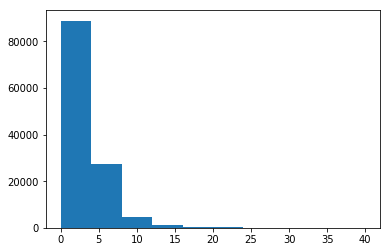

In [11]:
dist_hist_raw = evaluate_graphs(line_54_swm, graphs_raw_54)

#### SWM vs data generated graph

/home/petit/ml-lab-summer-18-project-5/library/graph_utils/rtree.py:127: RuntimeWarning: invalid value encountered in double_scalars
  rel_loc = dot / (line_end - line_start).T.dot(line_end - line_start)
/home/petit/ml-lab-summer-18-project-5/library/graph_utils/rtree.py:130: RuntimeWarning: invalid value encountered in double_scalars
  np.linalg.norm(line_end - line_start))


The mean error is 2.134084421508611
The variance is 2.501220946585051


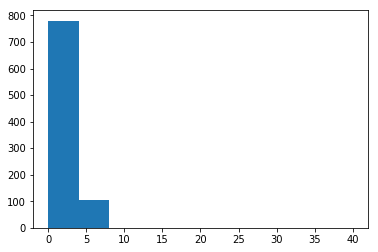

In [41]:
dist_hist_map = evaluate_graphs(line_54_swm, [line_54_map])

#### SWM vs optimized graphs

/home/petit/ml-lab-summer-18-project-5/library/graph_utils/pose_graph_nx.py:1141: RuntimeWarning: invalid value encountered in double_scalars
  dot = (query - from_node).T.dot(to_node - from_node)
/home/petit/ml-lab-summer-18-project-5/library/graph_utils/pose_graph_nx.py:1144: RuntimeWarning: invalid value encountered in double_scalars
  distance = np.linalg.norm(np.cross(to_node - from_node, from_node - query)) \


The mean error is 3.432444038653355
The variance is 10.84128685961796


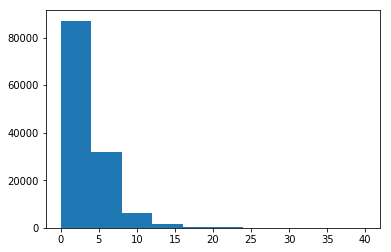

In [10]:
dist_hist_optim = evaluate_graphs(line_54_swm, optim_graphs)

In [9]:
def evaluate_graphs(base_graph, test_graphs):
    
    dist_hist = []
    
    base_graph.updateEdgeKeys()
    base_graph.rtree.build_r_tree(base_graph)
    
    for graph in test_graphs:
    
        for node in graph.nx_graph.nodes:
            position = (graph.nx_graph.nodes[node]['x'], graph.nx_graph.nodes[node]['y'])
            edge, rel_loc, dist = base_graph.rtree.find_closest_edge(position)

            if dist < 10000:
                dist_hist.append(dist)
    
    dist_hist = np.array(dist_hist)
    mean = np.mean(dist_hist)
    var = np.var(dist_hist) 
    
    hist = pyplt.hist(dist_hist, range=(0, 40))
    
    print("The mean error is {}".format(mean))
    print("The variance is {}".format(var))
    
    return dist_hist


### Plot the evaluation results in violin plots

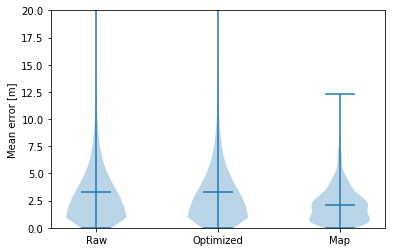

In [49]:
violinplot([dist_hist_raw, dist_hist_optim, dist_hist_map], savefig=True, dpi=100)

In [48]:
def violinplot(histogramms, x_label='violinssss', y_label='Mean error [m]', title="", savefig=False, dpi=100):
    _, ax = pyplt.subplots()
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Raw', 'Optimized', 'Map'])
    # Draw bars, position them in the center of the tick mark on the x-axis
    plot = ax.violinplot(histogramms, points=100, widths=0.5,
                         showmeans=True, showextrema=True, vert=True)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.set_ylabel(y_label)
    ax.set_ylim((0, 20))
    ax.set_title(title)
    
    if savefig:
        _.savefig('Basic.png', dpi=dpi)

### Visual evaluation of optimization

In [91]:
trips = dbi.getTripsForRouteAndDay("62", "2018-02-18")
print(len(trips))
print(trips.head(10))

220
   VEH_TRIP_ID
0   1688299334
1   1688299499
2   1688299908
3   1688300084
4   1688300487
5   1688300653
6   1688301059
7   1688301131
8   1688373290
9   1688373450


In [93]:
graph_raw = pg.PoseGraph()
graph_raw.loadTripFromDb(1688527954, min_sparse=)

True

In [16]:
optimizer = opti.Optimizer()
graph_opti = optimizer.optimizeGD(graph_raw)

Loss before any optimization 2762893.75
Current loss 2346764.25 at iteration 0
Current loss 674543.9375 at iteration 20
Current loss 437121.15625 at iteration 40
Current loss 329261.8125 at iteration 60
Current loss 263171.15625 at iteration 80
Current loss 220247.40625 at iteration 100
Current loss 191838.625 at iteration 120
Current loss 172011.875 at iteration 140
Current loss 157483.8125 at iteration 160
Current loss 146500.578125 at iteration 180
Current loss 138034.3125 at iteration 200
Current loss 131419.6875 at iteration 220
Current loss 126183.9921875 at iteration 240
Current loss 121976.2109375 at iteration 260
Current loss 118530.5 at iteration 280
Current loss 115643.75 at iteration 300
Current loss 113165.9921875 at iteration 320
Current loss 110991.515625 at iteration 340
Current loss 109047.453125 at iteration 360
Current loss 107288.171875 at iteration 380
Current loss 105685.9609375 at iteration 400
Current loss 104226.171875 at iteration 420
Current loss 102899.86718

In [17]:
position = np.array([ 48.165152, 11.588042 ])
plotter = plt.Plotter()
plotter.addNodeLayer(graph_raw, color=grey)
plotter.addEdgeLayer(graph_raw)
plotter.addHeadingLayer(graph_raw, color=grey)
# heatmap = plotter.addHeatmapLayer([merged_graphs_raw])
plotter.addNodeLayer(graph_opti, color=violette)
plotter.addHeadingLayer(graph_opti, color=violette)
plotter.addEdgeLayer(graph_opti)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

### Abstract graph

In [15]:
abstract_54 = sparsifier.sparsifyPoseGraph(line_54_map, criteria="all", epsilon=1000)

Dropped 844 edges.


In [16]:
len(abstract_54.nx_graph.nodes)

46

In [17]:
splitters = sparsifier.findSetSplitters(abstract_54.nx_graph)

In [18]:
len(splitters)

45

In [19]:
plotter = plt.Plotter()
plotter.addNodeLayer(abstract_54)
plotter.addEdgeLayer(abstract_54, color=(30, 30, 30, 0.9))
plotter.addDoorLayer(abstract_54)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

## Visual evaluation at Herkomplatz
Herkomplatz is a really complicated location with more than eight bus lanes interesecting each other. Therefore it well suited for some visual evaluation of the algortihm.

In [21]:
line_54_1 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_54_route_1.graph", "rb"))
line_54_2 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_54_route_2.graph", "rb"))

In [22]:
line_154_1 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_154_route_1.graph", "rb"))
line_154_2 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_154_route_2.graph", "rb"))

In [28]:
line_44_1 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_44_route_1.graph", "rb"))
line_44_2 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_154_route_2.graph", "rb"))

In [23]:
line_43_1 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_43_route_1.graph", "rb"))
line_43_2 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_43_route_2.graph", "rb"))

In [24]:
line_72_1 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_72_route_1.graph", "rb"))
line_72_2 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_72_route_2.graph", "rb"))

In [26]:
line_188_1 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_188_route_1.graph", "rb"))
line_188_2 = pickle.load( open("../graphs/evaluation/herkomerplatz/swm_line_188_route_2.graph", "rb"))

In [29]:
graphs = [line_54_1, line_54_2, line_154_1, line_154_2, line_44_1, line_43_1, line_72_1, line_188_1, line_188_2]

In [31]:
subgraphs = []
position = np.array([48.150912, 11.608780])

for i, graph in enumerate(graphs):
    print(i)
    subgraph = graph.exportSubgraphNN(lat_lon=position, k=50)
    subgraphs.append(subgraph)


0
1
2
3
4
5
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling thresho

Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not en

Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not enough a nearest neighbors within threshold!
Doubling threshold...
Not en

OverflowError: int too large to convert to float

In [38]:
plotter = plt.Plotter()

for subgraph in subgraphs:
    plotter.addNodeLayer(subgraph, color=green, size=8)
    plotter.addEdgeLayer(subgraph)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))

In [42]:
herkom_map = pickle.load( open("../graphs/herkomplatz/herkomerplatz_874trips.graph", "rb"))

In [43]:
position = np.array([48.150912, 11.608780])
subgraph = herkom_map.exportSubgraphNN(lat_lon=position, k=200)


In [44]:
plotter = plt.Plotter()
plotter.addNodeLayer(subgraph)
plotter.addEdgeLayer(subgraph)
plotter.plotGmaps()

Figure(layout=FigureLayout(height='420px'))